<h1>Assignments for "Data Cleaning - Outliers"</h1>

In this assignment, you continue to study the data of the US Education System. Again, please down it from here (dataset). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import zscore
from scipy.stats.mstats import winsorize

states = pd.read_csv("states_all.csv")
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In our last assignment about "Missing Values", after we fill the missing values with average, we don't have any missing value anymore. So we again fill them with average values to handle to them.

In [2]:
#ilk 3 sütunumda boş veri olmadığı için geri kalan sütunları dolduruyorum.
for i in states.columns[3:]:
    for year in states['YEAR'].unique():
        states[i].fillna(states[states['YEAR'] == year][i].mean(), inplace=True)

In [3]:
states.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

<b>(1)</b> See TOTAL_REVENUE, which includes total revenue data, and TOTAL_EXPENDITURE, which includes total spending data. Do these variables contain outliers?

In [4]:
states[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']]

,TOTAL_REVENUE,TOTAL_EXPENDITURE
0,2.678885e+06,2.653798e+06
1,1.049591e+06,9.724880e+05
2,3.258079e+06,3.401580e+06
3,1.711959e+06,1.743022e+06
4,2.626002e+07,2.713883e+07
...,...,...
1710,4.572764e+06,4.653591e+06
1711,4.572764e+06,4.653591e+06
1712,4.572764e+06,4.653591e+06
1713,4.572764e+06,4.653591e+06


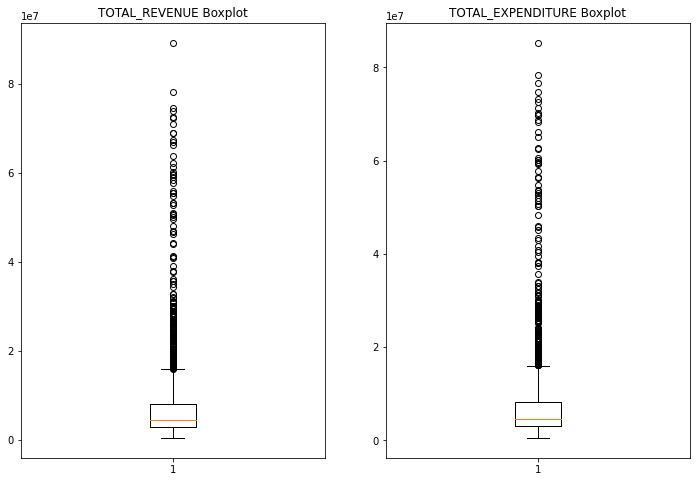

In [5]:
plt.figure(figsize=(12, 8))

plt.subplot(121) 
plt.boxplot(states['TOTAL_REVENUE'])  #since we filled the missing values, we don't say .dropna()
plt.title("TOTAL_REVENUE Boxplot")

plt.subplot(122)
plt.boxplot(states['TOTAL_EXPENDITURE'])
plt.title("TOTAL_EXPENDITURE Boxplot")

plt.show()

<p>Box plot shows us that we have outliers in both features. Let examine to outliers with statistical models.</p>

In [6]:
rev_z = zscore(states["TOTAL_REVENUE"])
exp_z = zscore(states["TOTAL_EXPENDITURE"])

print("Outliers in Total Revenue:\n")
for threshold in range(1, 5):
    print("Threshold: {}".format(threshold))
    print("Number of Outliers: {}\n".format(len(np.where(rev_z > threshold)[0])))
    
print('--'*20)    
print("\nOutliers in Total Expenditure:\n")
for threshold in range(1, 5):
    print("Threshold: {}".format(threshold))
    print("Number of Outliers: {}\n".format(len(np.where(exp_z > threshold)[0])))

Outliers in Total Revenue:

Threshold: 1
Number of Outliers: 165

Threshold: 2
Number of Outliers: 70

Threshold: 3
Number of Outliers: 43

Threshold: 4
Number of Outliers: 33

----------------------------------------

Outliers in Total Expenditure:

Threshold: 1
Number of Outliers: 161

Threshold: 2
Number of Outliers: 67

Threshold: 3
Number of Outliers: 44

Threshold: 4
Number of Outliers: 35



In [7]:
q75_rev, q25_rev = np.percentile(states["TOTAL_REVENUE"], [75 ,25])
IQR = q75_rev - q25_rev

threshold_values=[]
for threshold_value in np.arange(1,6,1):
    min_value = q25_rev - (IQR*threshold_value)
    max_value = q75_rev + (IQR*threshold_value)
    outlier_value_number = len((np.where((states["TOTAL_REVENUE"]> max_value)| (states["TOTAL_REVENUE"] < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,1,246
1,2,161
2,3,111
3,4,70
4,5,50


In [8]:
q75_exp, q25_exp = np.percentile(states["TOTAL_EXPENDITURE"], [75 ,25])
IQR = q75_exp - q25_exp

threshold_values=[]
for threshold_value in np.arange(1,6,1):
    min_value = q25_exp - (IQR*threshold_value)
    max_value = q75_exp + (IQR*threshold_value)
    outlier_value_number = len((np.where((states["TOTAL_EXPENDITURE"]> max_value)| (states["TOTAL_EXPENDITURE"] < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,1,246
1,2,160
2,3,109
3,4,67
4,5,50


<p>Both Z-score and Tukey methods say that total revenue and total expenditure features have outlier values.</p>

<b>(2)</b> If you find outliers in the total income TOTAL_REVENUE and total expenditure TOTAL_EXPENDITURE variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

In [9]:
states['WINSORIZED_TOTAL_REVENUE'] = winsorize(states['TOTAL_REVENUE'], (0.10, 0.15))
states['WINSORIZED_TOTAL_EXPENDITURE'] = winsorize(states['TOTAL_EXPENDITURE'], (0.10, 0.15))

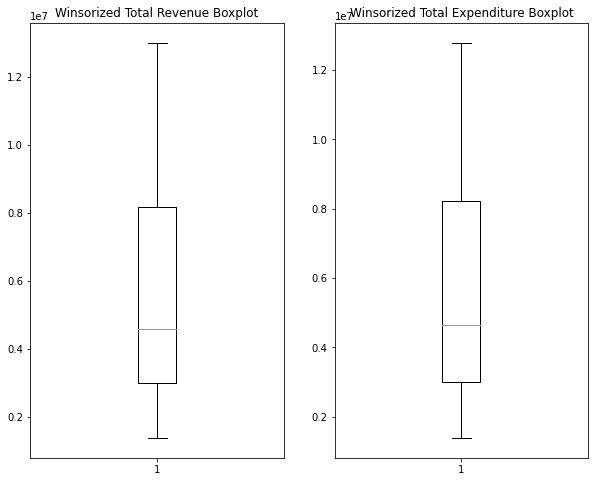

In [10]:
plt.figure(figsize=(10, 8))

plt.subplot(121) 
plt.boxplot(states['WINSORIZED_TOTAL_REVENUE'])
plt.title("Winsorized Total Revenue Boxplot")

plt.subplot(122)
plt.boxplot(states['WINSORIZED_TOTAL_EXPENDITURE'])
plt.title("Winsorized Total Expenditure Boxplot")

plt.show()

In [11]:
q75_rev_win, q25_rev_win = np.percentile(states["WINSORIZED_TOTAL_REVENUE"], [75 ,25])
IQR = q75_rev_win - q25_rev_win

threshold_values=[]
for threshold_value in np.arange(1,6,1):
    min_value = q25_rev_win - (IQR*threshold_value)
    max_value = q75_rev_win + (IQR*threshold_value)
    outlier_value_number = len((np.where((states["WINSORIZED_TOTAL_REVENUE"]> max_value)| (states["WINSORIZED_TOTAL_REVENUE"] < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [12]:
q75_exp_win, q25_exp_win = np.percentile(states["WINSORIZED_TOTAL_EXPENDITURE"], [75 ,25])
IQR = q75_exp_win - q25_exp_win

threshold_values=[]
for threshold_value in np.arange(1,6,1):
    min_value = q25_exp_win - (IQR*threshold_value)
    max_value = q75_exp_win + (IQR*threshold_value)
    outlier_value_number = len((np.where((states["WINSORIZED_TOTAL_EXPENDITURE"]> max_value)| (states["WINSORIZED_TOTAL_EXPENDITURE"] < min_value))[0]))
    threshold_values.append({'threshold_value': threshold_value,'outlier_value_number': outlier_value_number})
pd.DataFrame(threshold_values)

,threshold_value,outlier_value_number
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


<p>When we see the box plot and Tukey Method results, we don't have outliers after winsorizing.</p>

<b>(3)</b> Subtract the total expenditure TOTAL_EXPENDITURE from the total income variable TOTAL_REVENUE to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

In [13]:
states["Budget_Deficit"] = states["TOTAL_REVENUE"] - states["TOTAL_EXPENDITURE"]

In [14]:
states.Budget_Deficit.isnull().sum() #no missing values

0

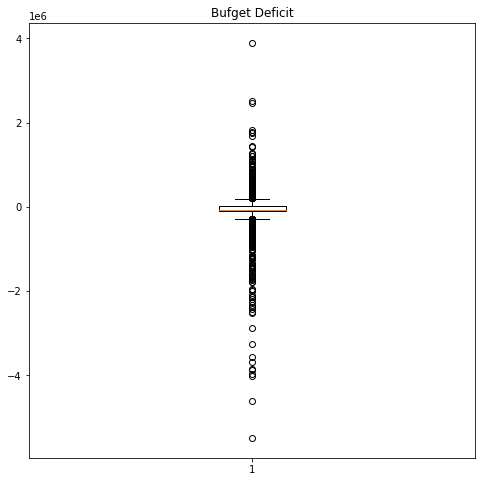

In [15]:
plt.figure(figsize=(8, 8))
plt.boxplot(states.Budget_Deficit)
plt.title("Bufget Deficit")
plt.show()

<p>As can be seen, we have outliers in both sides.</p>

In [16]:
states["Winsorized_Budget_Deficit"] = winsorize(states['Budget_Deficit'], (0.15, 0.15))

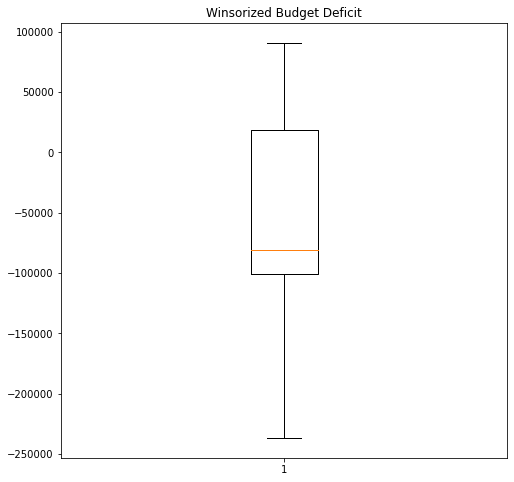

In [17]:
plt.figure(figsize=(8, 8))
plt.boxplot(states["Winsorized_Budget_Deficit"])
plt.title("Winsorized Budget Deficit")
plt.show()

<b>(4)</b> Again create a variable that can be considered as a budget deficit by subtracting the total income TOTAL_REVENUE variable from the total expenditure TOTAL_EXPENDITURE. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

In [18]:
states["Budget_Deficit_1"] = states["WINSORIZED_TOTAL_REVENUE"] - states["WINSORIZED_TOTAL_EXPENDITURE"]

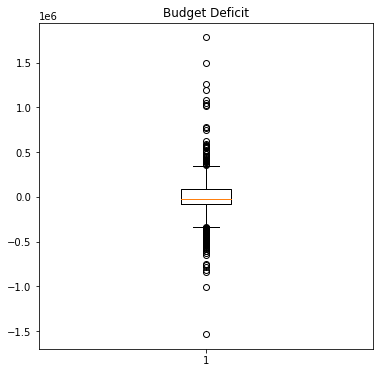

In [19]:
plt.figure(figsize=(6,6))
plt.boxplot(states["Budget_Deficit_1"] )
plt.title("Budget Deficit")
plt.show()

In [21]:
states["Winsorized_Budget_Deficit_1"] = winsorize(states['Budget_Deficit_1'], (0.10, 0.10))

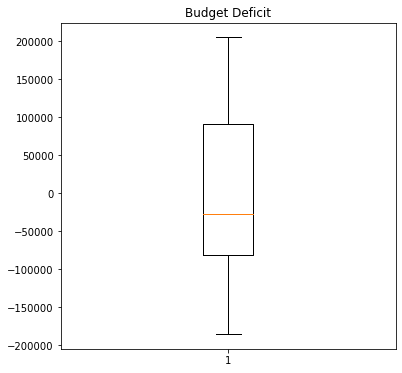

In [22]:
plt.figure(figsize=(6,6))
plt.boxplot(states["Winsorized_Budget_Deficit_1"] )
plt.title("Budget Deficit")
plt.show()

<b>(5)</b> Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

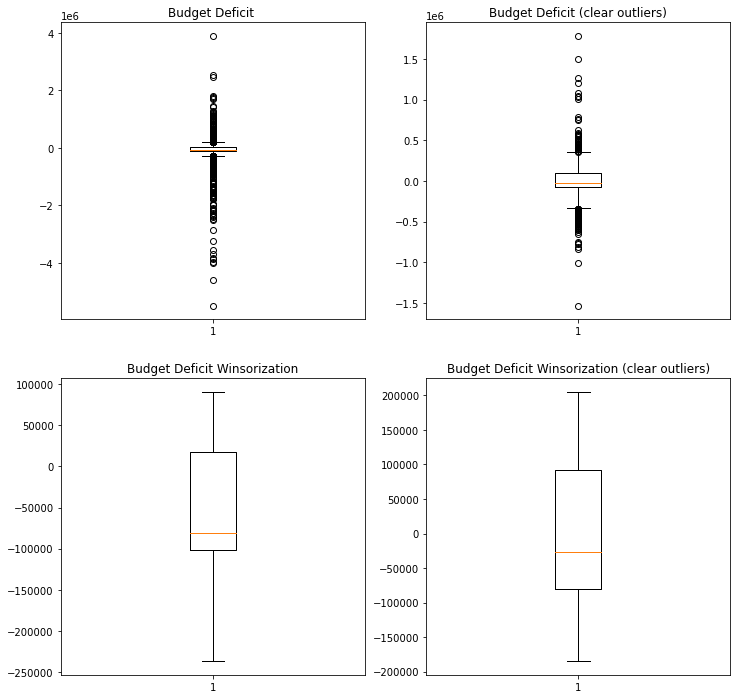

In [23]:
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.boxplot(states["Budget_Deficit"])
plt.title("Budget Deficit ")

plt.subplot(222)
plt.boxplot(states["Budget_Deficit_1"])
plt.title("Budget Deficit (clear outliers)") #question 4

plt.subplot(223)
plt.boxplot(states["Winsorized_Budget_Deficit"])
plt.title("Budget Deficit Winsorization")

plt.subplot(224)
plt.boxplot(states["Winsorized_Budget_Deficit_1"])
plt.title("Budget Deficit Winsorization (clear outliers)") #question 4

plt.show()

<p>When we calculate budget deficit with winsorize values of total revenue and total expenditure, we have less outliers. And also after winsorization of the second budget deficit features our values limit are larger than first budget deficition.</p>

<b>(6)</b> If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

<p>If it was a very important variable for us, I would choose the third question method, because in the fourth question method we loss most of the information about budget deficit. We say this information important so we shouldn't make any mistake. The loss of information/values can cause some disunderstanding and wrong interpretation.  </p>